## Assignment 3 by Group 3

#### Team Member: Chuanting Zong, Zizhao Wang, Xinyu Zou

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# 1. Load the Lending Club Dataset
## Load the dataset into a data frame named loans.

In [38]:
#from google.colab import drive

#drive.mount('/content/drive')
#loans = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lending-club-data.csv")
loans = pd.read_csv("lending-club-data.csv", index_col = 0, low_memory = False)

In [39]:
loans.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,NaN,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,NaN,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


# 2. Exploring Features
## Let's quickly explore what the dataset looks like. First, print out the column names to see what features we have in this dataset. Here, we should see that we have some feature columns that have to do with grade of the loan, annual income, home ownership status, etc.

In [40]:
loans.columns.values

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', 'sub_gr

# 3. Features for the classification algorithm
## In this assignment, we will be using a subset of features (categorical and numeric). The features we will be using are described below. Extract these feature columns and target columns from the dataset. We will only use these features.
features = ['grade', # grade of the loan
'sub_grade', # sub-grade of the loan
'short_emp', # one year or less of employment
'emp_length_num', # number of years of employment
'home_ownership', # home_ownership status: own, mortgage or rent
'dti', # debt to income ratio
'purpose', # the purpose of the loan
'term', # the term of the loan
'last_delinq_none', # has borrower had a delinquincy
'last_major_derog_none', # has borrower had 90 day or worse rating
'revol_util', # percent of available credit being used
'total_rec_late_fee', # total late fees received to day
]
## You may skip observations with missing values in these features.

In [41]:
features = ['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none', 'revol_util', 'total_rec_late_fee']
loans_features = loans[features]
loans_features.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
id,,,,,,,,,,,,
1077501,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00
1077430,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00
1077175,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00
1076863,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97
1075269,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00


In [42]:
loans_df = loans_features.join(loans['bad_loans'])

In [43]:
loans_df.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
id,,,,,,,,,,,,,
1077501,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,0
1077430,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,1
1077175,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,0
1076863,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,0
1075269,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,0


# 4. Exploring the Target Column
## The target column (label column) of the dataset that we are interested in is called bad_loans. In this column 1 means a risky (bad) loan 0 means a safe loan.
## Now, let us explore the distribution of the target column. This gives us a sense of how many safe and risky loans are present in the dataset. Print out the percentage of safe loans and risky loans in the data frame.
## It looks like most of these loans are safe loans (thankfully). But this does make our problem of identifying risky loans challenging.

In [44]:
target = ['bad_loans']
loans_target = loans_df[target]
loans_target.head()

,bad_loans
id,
1077501,0
1077430,1
1077175,0
1076863,0
1075269,0


In [45]:
counts0 = loans_target.value_counts()[0]
counts1 = loans_target.value_counts()[1]
print(counts0)
print(counts1)

99457
23150


In [46]:
length = len(loans_target)

In [47]:
percentage0 = counts0/length * 100
percentage1 = counts1/length * 100
print('percentage of safe is {:.2f}%'.format(percentage0))
print('percentage of risky is {:.2f}%'.format(percentage1))

percentage of safe is 81.12%
percentage of risky is 18.88%


# 5. Sample Data to Balance Classes
## Our data is disproportionally full of safe loans. Let's create two datasets: one with just the safe loans (safe_loans_raw) and one with just the risky loans (risky_loans_raw).
## One way to combat class imbalance is to undersample the larger class until the class distribution is approximately half and half. Here, we will undersample the larger class (safe loans) in order to balance out our dataset. This means we are throwing away many data points. We will use seed=1 so everyone gets the same results. Use the following codes for this task.
### #Since there are fewer risky loans than safe loans, find the ratio of the sizes and use that percentage to undersample the safe loans.
#### percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
#### risky_loans = risky_loans_raw
#### safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1)
### # Append the risky_loans with the downsampled version of safe_loans
#### loans_data = risky_loans.append(safe_loans)
## You can verify now that loans_data is comprised of approximately 50% safe loans and 50% risky loans.

In [48]:
risky_loans_raw = loans_df[loans_df['bad_loans'] == 1].copy()
safe_loans_raw = loans_df[loans_df['bad_loans'] == 0].copy()

In [50]:
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1)
#loans_data = risky_loans.append(safe_loans)
loans_data = pd.concat([risky_loans_raw, safe_loans['bad_loans']], ignore_index=True)

In [51]:
loans_data.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,0
0,C,C4,1.0,1.0,RENT,1.00,car,60 months,1.0,1.0,9.4,0.0,1.0,NaN
1,F,F2,0.0,5.0,OWN,5.55,small_business,60 months,1.0,1.0,32.6,0.0,1.0,NaN
2,B,B5,1.0,1.0,RENT,18.08,other,60 months,1.0,1.0,36.5,0.0,1.0,NaN
3,C,C1,1.0,1.0,RENT,10.08,debt_consolidation,36 months,1.0,1.0,91.7,0.0,1.0,NaN
4,B,B2,0.0,4.0,RENT,7.06,other,36 months,1.0,1.0,55.5,0.0,1.0,NaN


In [52]:
loans_data['bad_loans'].value_counts()

bad_loans
1.0    23150
Name: count, dtype: int64

# 6. One-Hot Encoding
## For scikit-learn's implementation, it requires numerical values for its data matrix. This means you will have to turn categorical variables into binary features via one-hot encoding.

In [53]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# 7. Split Data into Training and Validation and Test Sets
## First, split the original data into train-validate set (90%) and test set (10%) using random state = 0.
## Then, split the train-validate set into training set (80%) and validation set (20%) using random state = 0.

In [54]:
y = loans_data['bad_loans']
X = loans_data.drop(columns = 'bad_loans')

In [55]:
X.isna().sum()

grade                    23150
sub_grade                23150
short_emp                23150
emp_length_num           23150
home_ownership           23150
dti                      23150
purpose                  23150
term                     23150
last_delinq_none         23150
last_major_derog_none    23150
revol_util               23150
total_rec_late_fee       23150
0                        23150
dtype: int64

In [56]:
y.isna().sum()

23150

In [57]:
X

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,0
0,C,C4,1.0,1.0,RENT,1.00,car,60 months,1.0,1.0,9.4,0.0,NaN
1,F,F2,0.0,5.0,OWN,5.55,small_business,60 months,1.0,1.0,32.6,0.0,NaN
2,B,B5,1.0,1.0,RENT,18.08,other,60 months,1.0,1.0,36.5,0.0,NaN
3,C,C1,1.0,1.0,RENT,10.08,debt_consolidation,36 months,1.0,1.0,91.7,0.0,NaN
4,B,B2,0.0,4.0,RENT,7.06,other,36 months,1.0,1.0,55.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
46296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
46297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
46298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [58]:
X_e = encoder.fit_transform(X)
X_e.toarray()

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X_e, y, stratify=y, test_size = 0.1, random_state=0)

In [ ]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state=0)

# 8. Build a Decision Tree Classifier
## Build a decision tree classifier with max_depth = 2 or 6 or 10 using the training set.
## Visualize your decision trees.
## Compare the accuracy of the three decision tree classifiers using the validation set. Which one is the best? Report the best model’s performance on the test set.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
tree2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

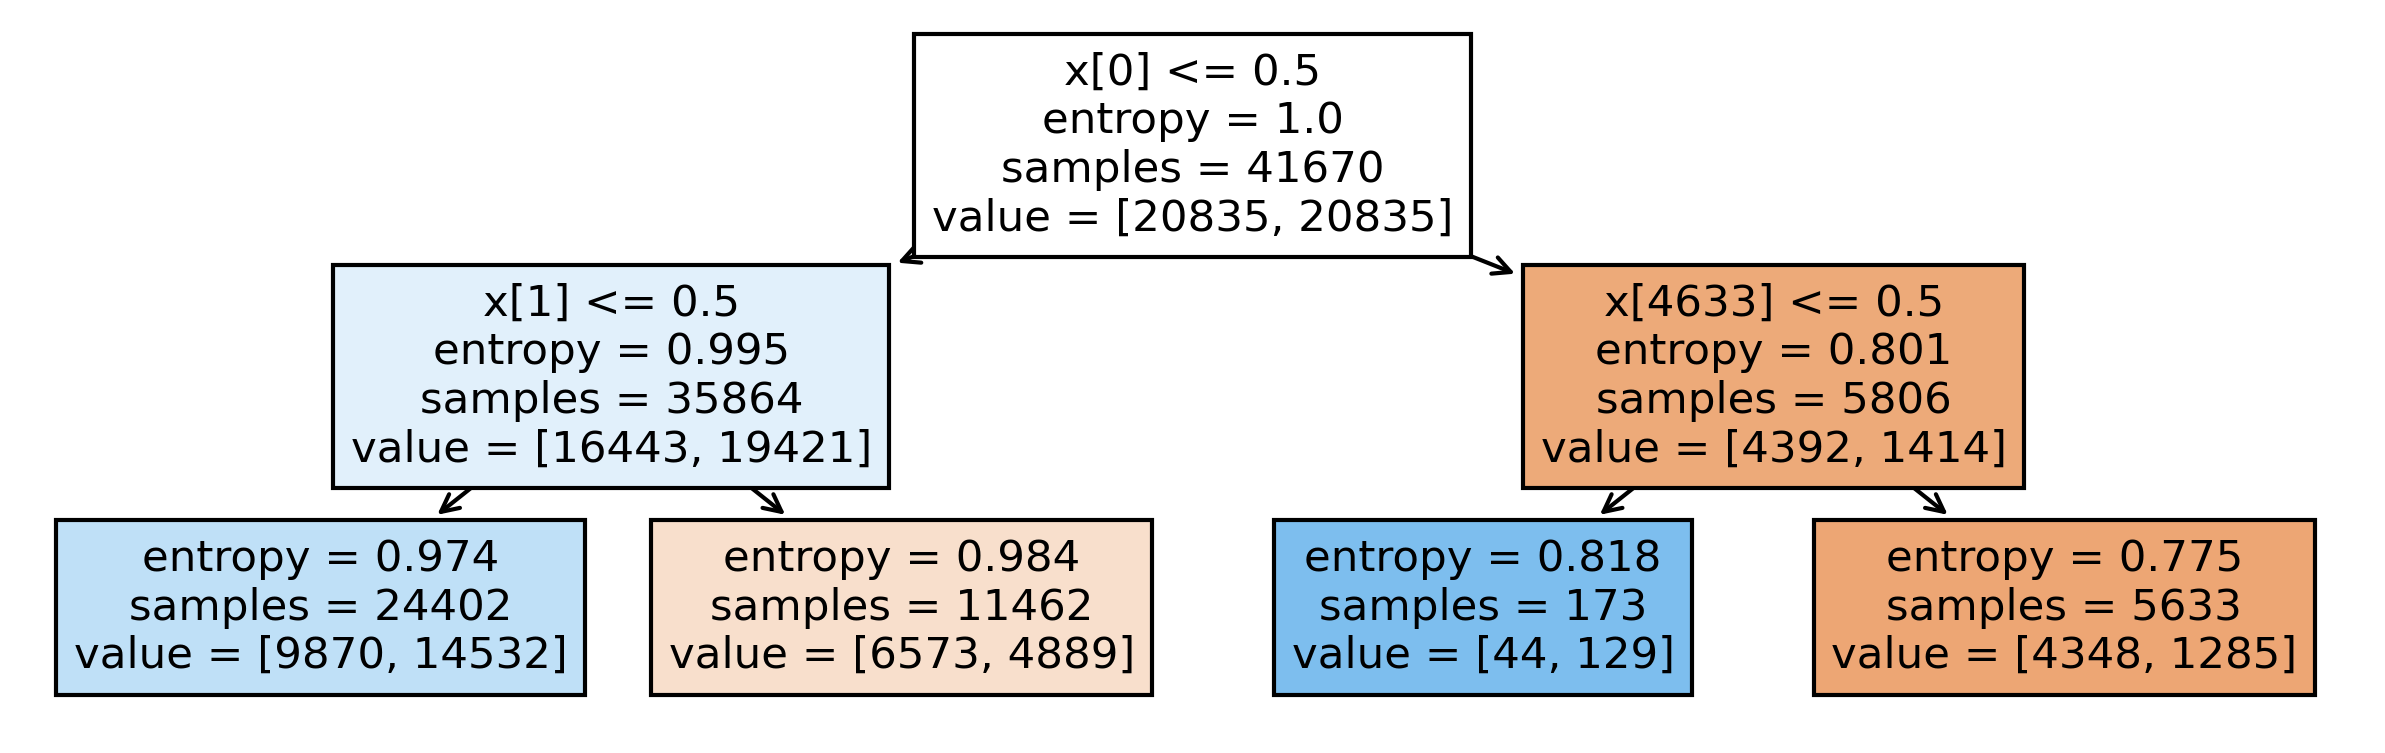

In [ ]:
plt.figure(figsize=(10, 3), dpi=300)
tree_dot2 = plot_tree(tree2, filled=True)

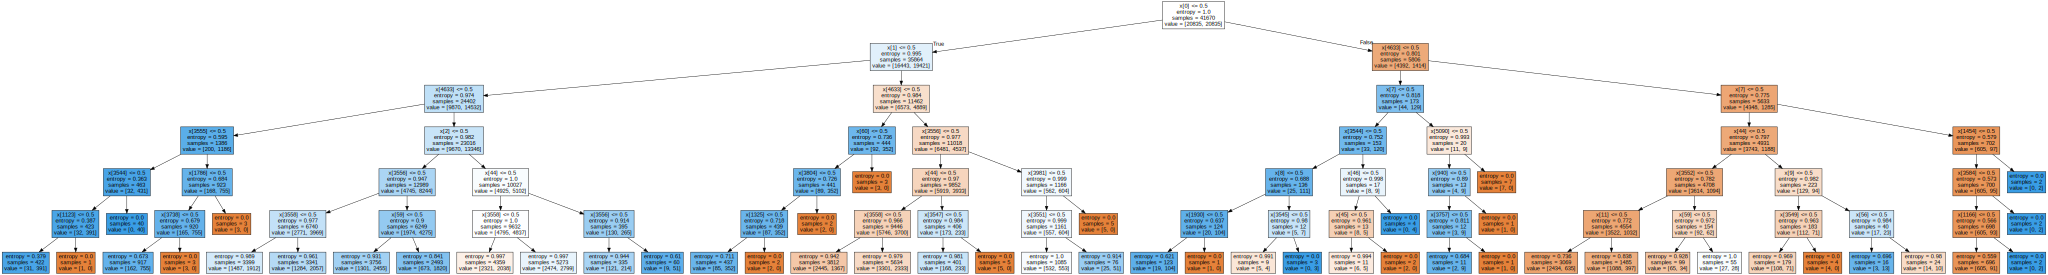

In [ ]:
import graphviz
tree6 = DecisionTreeClassifier(max_depth=6, criterion='entropy')
tree6.fit(X_train, y_train)
tree_dot6 = export_graphviz(tree6, out_file=None, filled=True)
graph6 = graphviz.Source(tree_dot6, format='png')
graph6

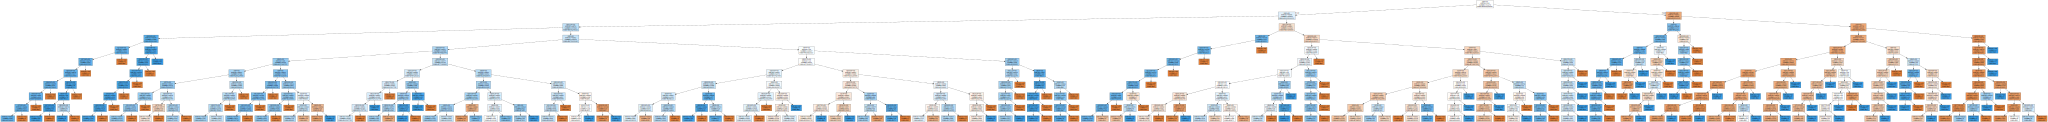

In [ ]:
tree10 = DecisionTreeClassifier(max_depth=10, criterion='entropy')
tree10.fit(X_train, y_train)
tree_dot10 = export_graphviz(tree10, out_file=None, filled=True)
graph10 = graphviz.Source(tree_dot10, format='png')
graph10

In [ ]:
tree2.feature_importances_

array([0.62777193, 0.30431598, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
tree6.feature_importances_

array([0.38560159, 0.18692255, 0.0766517 , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
tree10.feature_importances_

array([0.30472731, 0.14771828, 0.06057513, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
from sklearn.metrics import accuracy_score
y2_pred_val = tree2.predict(X_train_val)
acc2 = accuracy_score(y_train_val, y2_pred_val)
print('when max_depth is 2, accuracy is', acc2)

when max_depth is 2, accuracy is 0.615280777537797


In [ ]:
y6_pred_val = tree6.predict(X_train_val)
acc6 = accuracy_score(y_train_val, y6_pred_val)
print('when max_depth is 6, accuracy is', acc6)

when max_depth is 6, accuracy is 0.6331293496520278


In [ ]:
y10_pred_val = tree10.predict(X_train_val)
acc10 = accuracy_score(y_train_val, y10_pred_val)
print('when max_depth is 10, accuracy is', acc10)

when max_depth is 10, accuracy is 0.6471982241420686


In [ ]:
best_model = tree10
y_pred_best = best_model.predict(x_test)
acc_best = accuracy_score(y_test, y_pred_best)
print('The best model is when max_depth is 10, accurancy is', acc10)
print('The accuracy of test set is', acc_best)

The best model is when max_depth is 10, accurancy is 0.6471982241420686
The accuracy of test set is 0.6354211663066954


# 9. Explore Probability Predictions
## For each row in the validation set, what is the probability (using the best model from the previous comparisons) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)

In [ ]:
X_val

<8334x6361 sparse matrix of type '<class 'numpy.float64'>'
	with 100008 stored elements in Compressed Sparse Row format>

In [ ]:
probabilities = best_model.predict_proba(X_val)
max_val = np.max(probabilities)
np.where(probabilities == max_val)

(array([ 109,  131,  194,  259,  289,  346,  400,  444,  621,  705,  751,
         807,  876,  886,  947,  988, 1208, 1209, 1265, 1313, 1335, 1425,
        1517, 1541, 1593, 1645, 1696, 1720, 1732, 1803, 1832, 1922, 1925,
        1934, 1967, 2009, 2077, 2289, 2365, 2526, 2647, 2766, 2769, 2892,
        2987, 3000, 3034, 3058, 3062, 3074, 3115, 3195, 3247, 3257, 3300,
        3321, 3833, 3870, 3953, 4075, 4094, 4340, 4459, 4533, 4538, 4675,
        4759, 4948, 5027, 5100, 5142, 5240, 5358, 5525, 5569, 5643, 5686,
        5695, 5739, 5740, 5751, 5885, 5904, 5932, 5960, 6011, 6058, 6065,
        6088, 6122, 6183, 6195, 6205, 6233, 6277, 6349, 6362, 6412, 6425,
        6486, 6591, 6603, 6702, 6814, 6816, 6904, 6952, 6982, 7002, 7116,
        7138, 7156, 7187, 7200, 7362, 7376, 7463, 7558, 7578, 7779, 7829,
        7859, 7974, 7991, 8030, 8058, 8149, 8191, 8236]),
 array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1

In [ ]:
probabilities_risky = probabilities[:,1]
print(probabilities_risky)

[0.36842105 0.55625393 0.18596956 ... 0.45438283 0.26137135 0.66533409]


In [ ]:
import scipy.sparse
X_array = X_val.toarray()
X_df = pd.DataFrame(X_array)
X_df['probabilities_risky'] = probabilities_risky.tolist()
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6352,6353,6354,6355,6356,6357,6358,6359,6360,probabilities_risky
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368421
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556254
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185970
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.623348
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167785


# 10. Build a SVM Classifier
## Use 5-fold GridSearchCV on the train-validate set. Build a kernelized SVM classifier (preprocessing the data with MinMaxScaler) with rbf kernel and compare hyperparameters in the following grid:
## C: np.logspace(-3, 3, 7), gamma: np.logspace(-3, 3, 7) / X_train.shape[0]
## Report the best model’s performance on the test set.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [ ]:
# MinMaxScaler was not supported on my laptop
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
param_grid = {'C': np.logspace(-3, 3, 7),
               'gamma': np.logspace(-3, 3, 7)/X_train_scaled.shape[0]}
param_grid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'gamma': array([2.39980802e-08, 2.39980802e-07, 2.39980802e-06, 2.39980802e-05,
        2.39980802e-04, 2.39980802e-03, 2.39980802e-02])}

In [ ]:
#svm_classifier = SVC(kernel='rbf')
#grid = GridSearchCV(svm_classifier, param_grid=param_grid, cv=5)
#grid.fit(X_train_scaled, y_train, n_jobs = -1)

# 11. Build a Random Forest Classifier
## Use 5-fold GridSearchCV on the train-validate set. Build a random forest classifier and compare hyperparameters in the following grid:
### max_features: [2, 4, 6, 8, 10], max_depth: [6, 8, 10, 12, 14]
## Report the best model’s performance on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid2 = {'max_features': [2,4,6,8,10],
                'max_depth':[6,8,10,12,14]}
rf_classifier= RandomForestClassifier()
grid2 = GridSearchCV(rf_classifier, param_grid = param_grid2, cv=5, n_jobs = -1)

In [ ]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'max_features': [2, 4, 6, 8, 10]})

In [ ]:
best_max_features = grid2.best_params_['max_features']
best_max_depth = grid2.best_params_['max_depth']
best_model2 = RandomForestClassifier(max_features = best_max_features, max_depth = best_max_depth, random_state = 0)

In [ ]:
best_model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=10, random_state=0)

In [ ]:
y_test_pred2 = best_model2.predict(x_test)
acc_test2 = accuracy_score(y_test, y_test_pred2)
print('Random Forest:', acc_test2)

Random Forest: 0.6289416846652268


# 12. Build a Gradient Booster Classifier
## Use 5-fold GridSearchCV on the train-validate set. Build a gradient boosted tree classifier (fixing max_depth = 6) and compare hyperparameters in the following grid:
## learning_rate: np.logspace(-2, 0, 3), n_estimators: [5, 10, 50, 100, 200, 500]
## Report the best model’s performance on the test set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid3 = {'learning_rate': np.logspace(-2, 0, 3),
                'n_estimators': [5, 10, 50, 100, 200, 500]}
gb_classifier = GradientBoostingClassifier(max_depth=6)
grid3 = GridSearchCV(gb_classifier, param_grid = param_grid3, cv=5, n_jobs=-1)

In [ ]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(max_depth=6), n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.1 , 1.  ]),
                         'n_estimators': [5, 10, 50, 100, 200, 500]})

In [ ]:
best_learning_rate = grid3.best_params_['learning_rate']
best_n_estimators = grid3.best_params_['n_estimators']
best_model3 = GradientBoostingClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators, random_state = 0)

In [ ]:
best_model3.fit(X_train, y_train)

In [ ]:
y_test_pred3 = best_model3.predict(x_test)
acc_test3 = accuracy_score(y_test, y_test_pred2)
print('Gradient Booster Classifier:', acc_test2)

# 13. XGBoost, LightGBM, and CatBoost
## Try XGBoost, LightGBM, and CatBoost and see if you can get further improvement.
## Report the best model’s performance on the test set.

# 14. Final Evaluation
## After all the comparison, which model will you select?

